In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

На этот раз данные имеют следующую структуру:

записываются для каждого пользователя, совершившего покупки, каждый день для каждой даты есть своя папка, внутри неё – папки для каждого пользователя внутри каждой папки есть файл data.csv, где и хранятся данные  
Схематично выглядит так:  

└── data  
   ├── 2020-12-30  
   │  ├── FirstName_LastName1  
   │  │   └── data.csv  
   │  ├── FirstName_LastName2  
   │  │   └── data.csv  
   │  └── FirstName_LastName3  
   │      └── data.csv  
   └── 2020-12-31  
      ├── FirstName_LastName1  
      │   └── data.csv  
      └── FirstName_LastName5  
          └── data.csv  

1. Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), которые соответствуют названию папки, где лежит папка с пользователем)

pd.read_csv(path_to_files + data_files[0] +'/Petr_Ivanov/data.csv')

In [2]:
#os.listdir(path_to_files + data_files[0])
#Открывает файл с клиентами в определенный день

In [3]:
# Создаем список файлов всех дат
data_files = os.listdir('data')
data_files.sort()
data_files

['2020-12-03',
 '2020-12-04',
 '2020-12-05',
 '2020-12-06',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09']

In [4]:
# Создаем пустой датайрейм куда будем добавлять данные
df_shop = pd.DataFrame()

In [5]:
'''
Выведем все данные из отдельных файлов с помощью вложенных циклов
Сначала мы заходим в папку с датой, далее открываем каждую папку с фамилиями
покупающих. Вывлдим данные из csv файла и добавляем в наш датафрейм
'''
for date in data_files:
    for client in os.listdir('data/' + date):
        df_client = pd.DataFrame()
        df_client = pd.read_csv(f'data/{date}/{client}/data.csv',index_col='Unnamed: 0')
        df_client['name'] = client
        df_client['date'] = date
        df_shop = df_shop.append(df_client,ignore_index=True)
        

In [8]:
#Полученный датафрейм
df_shop

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
156,66,4,Rostislav_Petrov,2020-12-09
157,39,2,Rostislav_Petrov,2020-12-09
158,82,4,Vasiliy_Ivanov,2020-12-09
159,74,2,Vasiliy_Ivanov,2020-12-09


In [9]:
df_shop.quantity.sum()

480

2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [16]:
# Расчитываем количество единиц купленных товаров у каждого клиента
count_item = df_shop \
            .groupby('name', as_index=False) \
            .agg({'quantity': 'sum'}) \
# Расчитываем максимальное количество купленных товаров у каждого клиента
max_count = count_item.quantity.max()

In [23]:
# Выводим список клиентов, которые больше всех купили товаров в алфавитном порядке
print(*list(count_item \
            .query("quantity == @max_count") \
            .name \
            .sort_values()) \
     , sep=', ')

Alexey_Smirnov, Petr_Smirnov


3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот

In [24]:
most_popular_item = df_shop \
                    .groupby('product_id', as_index=False) \
                    .agg({'quantity': 'sum'}) \
                    .sort_values('quantity', ascending=False) \
                    .head(10)

<AxesSubplot:xlabel='product_id', ylabel='quantity'>

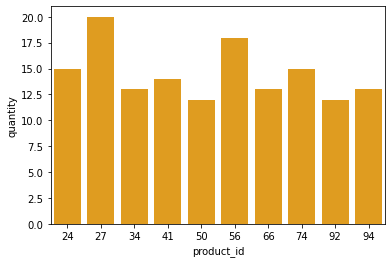

In [27]:
sns.barplot(data=most_popular_item, x='product_id', y="quantity", color='orange')

4. Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date)

In [29]:
sells_day = df_shop \
            .groupby('date', as_index=False) \
            .agg({'quantity': 'sum'}) \
            .rename(columns={'date': 'day'})

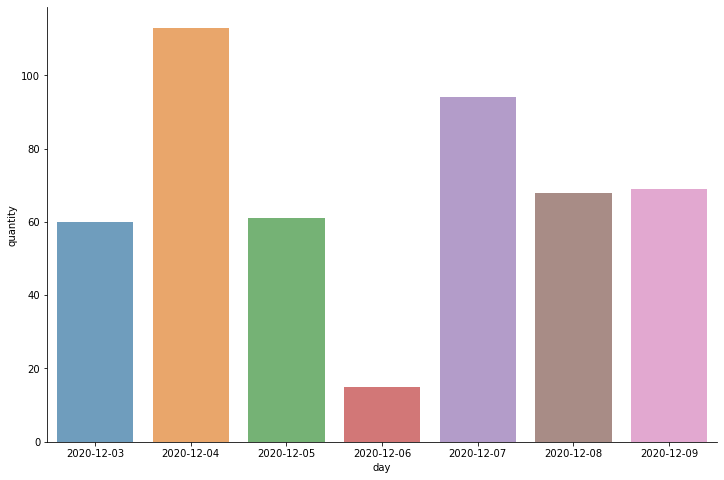

In [30]:
plt.figure(figsize=(12, 8))
sns.barplot(data=sells_day, x='day', y='quantity', alpha=0.7)
sns.despine()

5. Какие пользователи приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [36]:
# Сбросим покупки одинакового товара одним покупателем в один и тот же день
purshaes_in_dif_days = df_shop \
        .drop_duplicates(subset=['date', 'name', 'product_id'])

In [37]:
# Выводим покупателей, которые совершали покупки одного и того же товара в разные дни
purshaes_in_dif_days.loc[purshaes_in_dif_days.duplicated(subset=['name', 'product_id'])].name

104    Petr_Fedorov
147    Anton_Ivanov
Name: name, dtype: object